In [1]:

import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D

# GRADIENT DESENT

A Linear Regression model is a **linear model** with the following structure structure:

$$f(x) = w0 + \sum\limits_{j=1}^{d} {wj * xj}$$

We're going to find the weights of the linear equation that minimize the **Risk function**:

$$ (1/2N) * \sum\limits_{i=1}^{n} (yi - f(xi))^2$$


To do so, we'll need an optimization method, in this case, Gradient Descent. The Gradient Descent Algorithm consists in taking small steps towards the local minima, the point where our **Risk function has the lowest value**. To do so, we're going to compute the **gradients** (the partial derivative of each weight) and multiply them by the **learning rate** that we will define in order to update our weights.

We will repeat this process until:
  - The number of maximum steps we've defined is reached
  - The updates on the weights are so small that the model doesn't learn anymore.

In [17]:

path = "diamonds.csv"

data = pd.read_csv(path)

print(data)

r_indexs = [ random.randint(1, 53000) for i in range(150)] 

print(r_indexs)

       Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
5               6   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94   
6               7   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95   
7               8   0.26  Very Good     H     SI1   61.9   55.0    337  4.07   
8               9   0.22       Fair     E     VS2   65.1   61.0    337  3.87   
9              10   0.23  Very Good     H     VS1   59.4   61.0    338  4.00   
10             11   0.30       Good     J     SI1   64.0   55.0    339  4.25   
11             12   0.23      Ideal     

In [18]:
useless_features = ['color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
for f in useless_features:
    del data[f]
   
interpolations = [list(data.loc[r]) for r in r_indexs]
print(interpolations)

[[36450, 0.31, 'Ideal', 942], [17112, 1.01, 'Very Good', 6825], [44828, 0.52000000000000002, 'Ideal', 1624], [36644, 0.42999999999999999, 'Premium', 948], [13181, 1.3100000000000001, 'Very Good', 5450], [46463, 0.70999999999999996, 'Good', 1774], [5506, 0.82999999999999996, 'Ideal', 3846], [52587, 0.71999999999999997, 'Ideal', 2539], [29956, 0.32000000000000001, 'Ideal', 445], [52747, 0.70999999999999996, 'Ideal', 2559], [32295, 0.29999999999999999, 'Ideal', 454], [45521, 0.53000000000000003, 'Ideal', 1683], [32888, 0.35999999999999999, 'Ideal', 810], [12979, 1.01, 'Very Good', 5394], [42599, 0.5, 'Ideal', 1331], [28197, 0.40000000000000002, 'Very Good', 666], [45666, 0.52000000000000002, 'Ideal', 1694], [36580, 0.40000000000000002, 'Premium', 945], [3955, 0.69999999999999996, 'Ideal', 3504], [13168, 1.0, 'Premium', 5445], [4064, 0.31, 'Good', 571], [28707, 0.38, 'Ideal', 680], [44923, 0.73999999999999999, 'Very Good', 1632], [29976, 0.34999999999999998, 'Ideal', 715], [18265, 1.51, 'G

In [19]:
dic = {'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}
interpolations = [[p[0], p[1], dic[p[2]], p[3]] for p in interpolations]
print(interpolations)

[[36450, 0.31, 5, 942], [17112, 1.01, 3, 6825], [44828, 0.52000000000000002, 5, 1624], [36644, 0.42999999999999999, 4, 948], [13181, 1.3100000000000001, 3, 5450], [46463, 0.70999999999999996, 2, 1774], [5506, 0.82999999999999996, 5, 3846], [52587, 0.71999999999999997, 5, 2539], [29956, 0.32000000000000001, 5, 445], [52747, 0.70999999999999996, 5, 2559], [32295, 0.29999999999999999, 5, 454], [45521, 0.53000000000000003, 5, 1683], [32888, 0.35999999999999999, 5, 810], [12979, 1.01, 3, 5394], [42599, 0.5, 5, 1331], [28197, 0.40000000000000002, 3, 666], [45666, 0.52000000000000002, 5, 1694], [36580, 0.40000000000000002, 4, 945], [3955, 0.69999999999999996, 5, 3504], [13168, 1.0, 4, 5445], [4064, 0.31, 2, 571], [28707, 0.38, 5, 680], [44923, 0.73999999999999999, 3, 1632], [29976, 0.34999999999999998, 5, 715], [18265, 1.51, 2, 7418], [26735, 2.0600000000000001, 2, 16512], [42135, 0.5, 4, 1279], [22134, 1.6699999999999999, 3, 10165], [15617, 1.02, 5, 6264], [33959, 0.23000000000000001, 3, 465

In [20]:
# Plot a graph representation of the data in 3D
def plotGraph(features,plane):
    f1 = [p[1] for p in features]
    f2 = [p[2] for p in features]
    f3 = [p[3] for p in features]# Declaring some parameters
    mpl.rcParams['legend.fontsize'] = 10
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(f1, f2, f3, 'r.', label='Population Data') # Plot points
    ax.legend()

    if plane != False:
        # create x,y points to be part of the hyperplane
        xx, yy = np.meshgrid(np.linspace(min(f1)-1, max(f2)+1), np.linspace(min(f2)-1, max(f2)+1))
        # calculate corresponding z for each x,y pair
        z = plane[0] + plane[1]*xx + plane[2]*yy
        # plot the surface
        ax.plot_surface(xx, yy, z, cmap=mpl.cm.coolwarm)

    plt.show()

In [21]:
# Perform Linear Regression
def run(features, it, alpha = 0.005):
    # Initialize weights of the hyperplane (aka Betas) to 0
    w = [0, 0, 0]
    p_num = len(features) # Number of points
    # Will only restart when all points have been checked
    for i in range(it):	
    # Gradient sum for each w - updated later & risk & number of points
        gradient_sum = [0, 0, 0] 
        risk = 0
        # Check all points 
        for p in features:
            # Make the prediction w/ the regression function
            f_x = w[0] + w[1]*p[1] + w[2]*p[2]
            # Build the gradients for each feature/dimension
            gradient_sum[0] += (f_x - p[3])
            gradient_sum[1] += (f_x - p[3])*p[1]
            gradient_sum[2] += (f_x - p[3])*p[2]
            # Update risk w/ squared error
            risk += (f_x - p[2])**2

        # Update betas/weights with the (gradients * learning rate) & risk
        risk *= (1/(2*p_num)) 
        w[0] -= alpha*(1/p_num)*gradient_sum[0]
        w[1] -= alpha*(1/p_num)*gradient_sum[1]
        w[2] -= alpha*(1/p_num)*gradient_sum[2]

    # Output f(x) function and the regression hyperplane
    plotGraph(features, [w[0], w[1], w[2]])

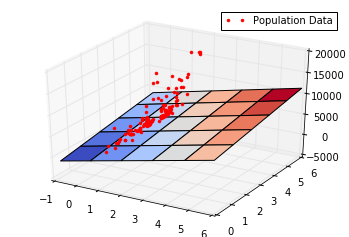

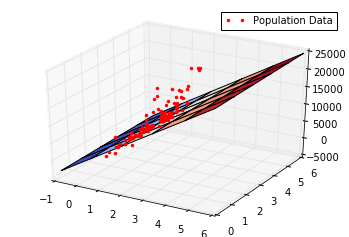

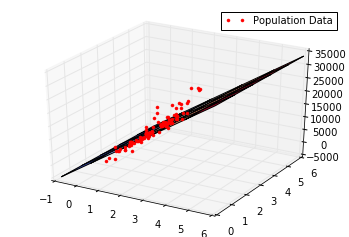

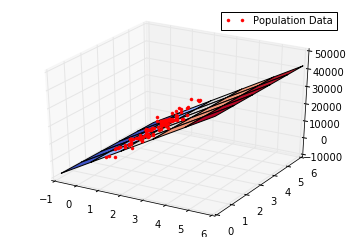

In [23]:
iterations = [100, 500, 1000, 2500]
for it in iterations:
    run(interpolations, it)